        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Individual Project - Spring 2022</h1>

You need to work on a popular Fashion MNIST dataset for this project. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. You can use all different models that you learned about them in this course for yourr work. Keep in mind that this is a project, not a class assignmnet. So, not all steps are predetermined and you have more flexibility, and the final outcome is likely to be more detailed.

In order to load the dataset you need to have `tensorflow V2` on your computer. Use the following code to install the package

In [235]:
!pip install --upgrade tensorflow

You can also check the version of it using the following code.

In [236]:
import tensorflow as tf
tf.__version__

'2.10.0'

Now, it's time to load the dataset

In [237]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [238]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

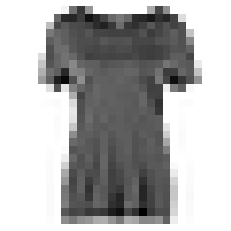

In [239]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[10]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

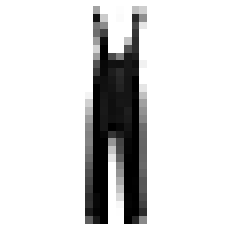

In [240]:
sample_image_1 = X_train[32000]
plt.imshow(sample_image_1, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [241]:
y_train[10]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [242]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]])

T-shirt/top


Now, it's your turn,

<ul>
    <li><b>Task1:</b> Use the train set to train various supervised models and evaluate their performance using the test set.</li>
    <ul>
        <li>Use different supervised learning models.</li>
        <li>Use different metrics such as <b>accutacy</b>, <b>precision</b>, <b>AUC</b>, and ... in your model evaluation. </li>
        <li>It is not enough to report the metrics. It is crucial that you interpret the metrics for each model and compare them across different models.</li>
        <li> You may need to use the cross validation methods for hyperparameter selection.</li>
        <li> Specify the model that outperforms the other models.</b>
    </ul>
    <li><b>Task2:</b> Use the best model to predict your own fashion pieces.</li>
    <ul>
        <li>Take a picture of five fashion pieces of your own (take pictures in square format).</li>
        <li>Resize images to the correct size (28,28).</li>
        <li>Grayscale your images.</li>
        <li>Visualize all the images side by side</li>
        <li>Use the best model in Task 1 to predict the label of each of your own images.</li>
        <li>How accurate is the final result?</li>
    </ul>
</ul>

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final work should be very well structured and should have a consistent flow of analysis.</li>
</ul>

#### Due Date: Nov 4 2022 at 11:59 AM

## Grading Criteria

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Comprehensiveness</th>
        <td style="text-align:center;border:1px black solid"><b>25%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Correctness</th>
        <td style="text-align:center;border:1px black solid"><b>25%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Complete Report</th>
        <td style="text-align:center;border:1px black solid"><b>25%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Clear Code</th>
        <td style="text-align:center;border:1px black solid"><b>25%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Innovation (Extra)</th>
        <td style="text-align:center;border:1px black solid"><b>10%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:center;border:1px black solid;color:red"><u>Total</u></th>
        <td style="text-align:center;border:1px black solid;color:red"><b stlyle="color:red">110%</b></td>
    </tr>
</table>

## <u>Project Objective</u>

<p>To predict the type of fashion item based on its images by creating a set of supervised learning models.</p>

## <u>Data Description</u>

In [243]:
# Shape of X_train
X_train.shape

(60000, 28, 28)

In [244]:
# Shape of y_train
y_train.shape

(60000,)

In [245]:
# Shape of X_test
X_test.shape

(10000, 28, 28)

In [246]:
# Shape of y_test
y_test.shape

(10000,)

<p>In total, our Fashion MNIST dataset contains 70,000 images which has been divided into two sets: a train and a test datasets. Our training dataset has 60,000 images and each image has a size of 28X28. And our testing dataset contains 10,000 images.Our dataset has 10 classes or labels.</p>

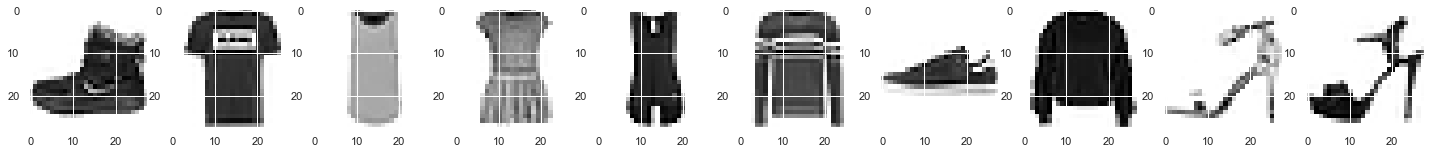

In [247]:
# Displaying some images from training set for observation
fig, axes = plt.subplots(1,10, figsize=(25,25))
for i in range(10):  
    axes[i].imshow(X_train[i], cmap='binary')

plt.show()

<p>In the above codes, I wanted to explore the overlook and size of the images in the training set to have a better understanding of the dataset.</p>

## <u>Pre-Processing of Data</u>

<p>Before training any model on our training dataset, we have flattened the images with below codes.</p>

In [249]:
#Converting X_train from 3D to 2D
P1,P2,P3=X_train.shape
X_train =X_train.reshape(P1,P2*P3) 
X_train.shape

(60000, 784)

In [250]:
#Converting X_test from 3D to 2D
Q1,Q2,Q3=X_test.shape
X_test =X_test.reshape(Q1,Q2*Q3) 
X_test.shape

(10000, 784)

## <u>Building and Training Different Models</u>

### 1. KNN Model

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

KNN_model = KNeighborsClassifier()

param_grid = {'n_neighbors': [1,2,3,4,5,6]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X_train, y_train)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'n_neighbors': 4}
Best Cross Vlidation Score: 0.8570166666666665


<p>At first, I have imported the necessary packages to build the KNN model. Now to decide the best parameter for KNN model, we have run cross validation with grid search using <u>StratifiedKFold</u>. I have used stratified Kfold to ensure specific subgroups are present in the sample while training a particular model and that way we can obtain precise estimates of each group's characteristics. We can observe that best parameter for n_neighbours is 4 and best cross validation score is around 85.702. In below codes, I have fitted the KNN model using best parameters and predicted y_K_test_hat. KNN was the most time consuming model for me in this project.</p>

In [38]:
KNN_model=grid.best_estimator_
y_K_test_hat =KNN_model.predict(X_test)

<b>Out of sample accuracy for KNN model</b>

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_K_test_hat, normalize = True) * 100

85.77

<p>In the above codes, I have run the accuracy for KNN model on out of sample dataset and the result is 85.77 which is almost equivalent to our cross validation scores(85.702) as I have used best parameters here so it is quite logical.</p>

### 2. Logistic Regression Model

In [253]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

logreg_model = LogisticRegression(multi_class='multinomial')
X=X_train
y=y_train
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
accuracy_logreg = cross_val_score(logreg_model, X, y, cv=cv, scoring='accuracy')


print("Cross Validation Scores for Log Reg: {}".format(accuracy_logreg))
print("Mean Accuracy Score for Log Reg: {}".format(np.mean(accuracy_logreg)))

Cross Validation Scores for Log Reg: [0.854      0.854      0.85433333 0.85233333 0.84825   ]
Mean Accuracy Score for Log Reg: 0.8525833333333332


<p>Initially I was getting some warnings while running logistic regression so to avoid those warnings, I have imported <u>warnings</u> package and ignored all the warnings. Usually logistic regression model will have two classes, but for our dataset it has 10 classes so I have used multinomial logistic regression. As before to obtain precise characteristics of each category, I have used stratified Kfold with 5 splits. I have also used <u>cross_val_score</u> here to perform evaluation on the dataset and after cross validation it is returning a list of scores calculated for each 5 folds. Among the 5 scores, I am taking the mean accuracy score(85.258) to train my best model for logistic regression. Through below codes, I have fitted my training dataset into the model and predited y_LR_test_hat.</p>

In [251]:
best_LR_Model = logreg_model.fit(X_train,y_train)
y_LR_test_hat = best_LR_Model.predict(X_test)

<b>Out of sample accuracy for Logistic Regression Model</b>

In [252]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_LR_test_hat, normalize = True) * 100

84.11999999999999

<p>Accuracy for logistic regression model on out-of-sample data is around 84.12 which is closer to our mean accuracy score of 85.258.</p>

### 3. Naive Bayes Model

In [43]:
from sklearn.naive_bayes import GaussianNB 
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)
y_N_test_hat = naive_model.predict(X_test)

<p>Naive Bayes model is a benchmark model which is why it is considered the easiest model among different supervised learning techniques. Among the three types of Naive model, we have used <u>Gaussian</u> Naive Bayes model. In the above codes, we have defined the model, fitted our X_train and y_train into the model and predicted y_N_test_hat.</p>

<b>Out of sample accuracy for Naive Bayes Model</b>

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_N_test_hat, normalize = True) * 100

58.56

<p>Accuracy of out-of-sample dataset for Naive Bayes model is 58.56 which is the lowest accuracy found among all the models trained and tested for this project.</p>

<b>Confusion Matrix for Naive Bayes Model</b>

<p>In below codes, I have drawn a confusion matrix for naive bayes model. And we can monitor that f1 score is highest for class 1, 8 and 9 as these classes has maximum number of true positives of 939, 710 and 667 respectively.</p>

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix")
cf_N_matrix=confusion_matrix(y_test,y_N_test_hat)
print(cf_N_matrix)
print(classification_report(y_test,y_N_test_hat))

Confusion Matrix
[[586  64  29 162 110   0  20   0  29   0]
 [  1 939  14  36   7   0   1   0   2   0]
 [  7  14 324  65 545   0  23   0  22   0]
 [  9 387   6 545  43   0   4   0   6   0]
 [  0  34  44 131 779   0   4   0   8   0]
 [  0   0   1   1   0 278   3 660   5  52]
 [117  34 112 200 435   0  40   0  62   0]
 [  0   0   0   0   0   3   0 988   0   9]
 [  0   2  19  85 149   3  27   4 710   1]
 [  0   0   1   1   0  16   3 304   8 667]]
              precision    recall  f1-score   support

           0       0.81      0.59      0.68      1000
           1       0.64      0.94      0.76      1000
           2       0.59      0.32      0.42      1000
           3       0.44      0.55      0.49      1000
           4       0.38      0.78      0.51      1000
           5       0.93      0.28      0.43      1000
           6       0.32      0.04      0.07      1000
           7       0.51      0.99      0.67      1000
           8       0.83      0.71      0.77      1000
           

<b>Heatmap of confussion matrix for Naive Bayes Model</b>

<p>Here I have created a heatmap for the confusion matrix to visualize it graphically.</p>

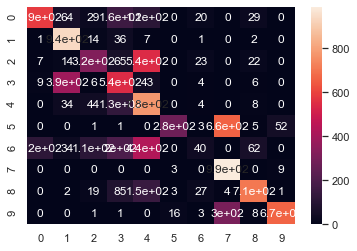

In [46]:
import seaborn as sns; sns.set() 
sns.heatmap(cf_N_matrix, annot=True)
plt.show()

### 4. Random Forest Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
random_model = RandomForestClassifier()
param_grid = {'n_estimators':[100,150,200] }
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid_1 = GridSearchCV(random_model, param_grid, cv = cv, 
                    return_train_score=True, scoring='accuracy')

grid_1.fit(X_train, y_train)

print("Best Parameter: {}".format(grid_1.best_params_))
print("Best Cross Vlidation Score: {}".format(grid_1.best_score_))

Best Parameter: {'n_estimators': 200}
Best Cross Vlidation Score: 0.8844666666666667


<p>As my fourth model, I have choosen random forest model. To figure out the best parameters for my random model, I have used StratifiedKFold with 5 splits and cross validation with grid search to have a more meaningful result when compared to our original train/test split with minimal tuning. As we can see that our best n_estimators is 200 and best cross validation score is 88.447. In below codes, I have fitted my model according to the best estimators and predidted y_R_test_hat.</p>

In [255]:
random_model = grid_1.best_estimator_
y_R_test_hat  = random_model.predict(X_test)

<b>Out of sample accuracy for Random Forest Model</b>

In [256]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_R_test_hat, normalize = True) * 100

87.75

<p>Accuracy of random forest model for out-of-sample dataset is 87.75 and best cross validation score is 88.447. As we are calculating accuracy on testing dataset so it is only logical that out-of-sample accuracy will be lower than in-sample accuracy. So far, random forest model is giving the highest number of accuracy among the 4 models.</p>

### 5. Neural Network Model

In [62]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

NN_model = MLPClassifier(solver='lbfgs')
param_grid = {'hidden_layer_sizes':[[200,100,50],[300,150,50]]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid_2 = GridSearchCV(NN_model, param_grid, cv = cv, 
                    return_train_score=True, scoring='accuracy')

grid_2.fit(X_train, y_train)

print("Best Parameter: {}".format(grid_2.best_params_))
print("Best Cross Vlidation Score: {}".format(grid_2.best_score_))

Best Parameter: {'hidden_layer_sizes': [300, 150, 50]}
Best Cross Vlidation Score: 0.86305


<p>Considering our large training dataset of 60,000 images, I have choosen neural network as my 5th model as it works best on a large number of datasets. As we know that the total number of hidden layers should be lower than our input layers so I have passed two sets of hidden layers here [200,100,50] and [300,150,50]. Using StratifiedKFold with 5 splits and cross validation with grid search, I have found [300, 150, 50] as my best parameter for neural network model with a cross validation score of 86.305. After fitting my training set into the best model, I have predicted y_NN_test_hat below. </p>

In [55]:
best_NN_Model = grid_2.best_estimator_
y_NN_test_hat  = best_NN_Model.predict(X_test)

<b>Out of sample accuracy for Neural Network Model</b>

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_NN_test_hat, normalize = True) * 100

85.14

<p>Accuracy of neural network model for out-of-sample dataset is 85.14 compared to cross validation score of 86.305.</p>

### 6. Decision Tree Model

In [1]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
param_grid = {'max_depth': [5,6,7,8,9]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid_3 = GridSearchCV(DT_model, param_grid, cv = cv, 
                    return_train_score=True, scoring='accuracy')

grid_3.fit(X_train, y_train)

print("Best Parameter: {}".format(grid_3.best_params_))
print("Best Cross Vlidation Score: {}".format(grid_3.best_score_))

NameError: name 'StratifiedKFold' is not defined

<p>My last model for this project is decision tree and I have used both <u>StratifiedKFold</u> and <u>GridSearchCV</u> to find the best parameters and respective cross validation score. The result shows that best parameter is 9 and best score for cross validation is 80.299. After that I have fitted my trainig data into my best model and predicted y_D_test_hat in below cell.</p>

In [58]:
best_DT_Model = grid_3.best_estimator_
y_D_test_hat  = best_DT_Model.predict(X_test)

<b>Out of sample accuracy for Decision Tree Model</b>

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_D_test_hat, normalize = True) * 100

79.79

<p>In comparison to best cross validation score of 80.299, accuracy of out-of-sample data for decision tree model is 79.79.</p>

## <u>Predicting Individual Fashion Items</u>

<p>From part 1, I have found random forest as my best model. For the 2nd part of the project, I have taken 10 different fashion items to predict based on my best model. I wanted to monitor whether my best model can actually predict different fashoin items correctly or not that's why I have taken a variety of fashion items. For each image, I have repeated couple of steps. At first, I have read my image after importing all necessary library and packagaes and printed it. Before importing, I have changed the background of all images into white and converted into a square format of 1000X1000. Then I have printed the shape of my raw image which is (1000, 1000, 3). After that I have converted my image into grayscale using <u>cmap='gray'</u>. I tried to use cmap='binary' as well but it was giving me darker background lighter image of the object. So,to make it more align and homogenous as my training dataset I have used gray instead of binary in cmap. Grayscale automatically changes my 3 dimensional image into 2 dimensions transforming the shape into (1000, 1000). In the next step, I have resized my image into the correct size of 28X28 similar to my training dataset. Then I have flattened the image using the <u>reshape</u> function to run into my model. At last step, I have predicted my image using my best model which is random forest moodel. I have repeated this steps for all 10 raw images that I have taken for prediction purposes.</p>

#### *T-shirt Image*

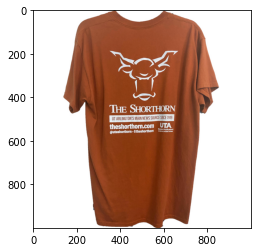

In [20]:
# 1st raw image
#!pip install opencv-python
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Sample_Image_1 = cv2.imread('t-shirt_file.jpg')

plt.imshow(Sample_Image_1)

plt.show()

In [21]:
# 1st raw image
# Shape of the image
Sample_Image_1.shape

(1000, 1000, 3)

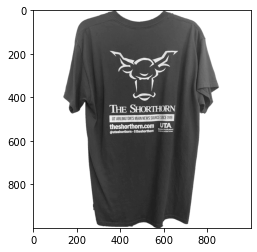

In [94]:
# 1st raw image
# Grayscale the image using cv2
Sample_Image_1_gray = cv2.cvtColor(Sample_Image_1, cv2.COLOR_BGR2GRAY)
plt.imshow(Sample_Image_1_gray,cmap='gray')
plt.show()

In [23]:
# 1st raw image
#Shape of grayscale image
Sample_Image_1_gray.shape

(1000, 1000)

In [24]:
# 1st raw image
# Resizing the image to the correct size (28,28)
Df1=cv2.resize(Sample_Image_1_gray,(28,28))
Df1.shape

(28, 28)

In [25]:
# 1st raw image
# Flattening the image through reshaping
New_Tshirt_Image=np.reshape(Df1,(-1,28*28))

print(New_Tshirt_Image.shape)

(1, 784)


In [258]:
#Predicting the image with the best model
y_R_test_hat  = random_model.predict(New_Tshirt_Image)
print(class_names[y_R_test_hat[0]])

Shirt


#### *Shirt Image*

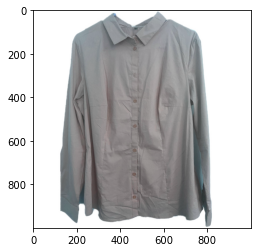

In [26]:
# 2nd raw image
# Reading the image
Sample_Image_2 = cv2.imread('shirt_file.jpg')

plt.imshow(Sample_Image_2)

plt.show()

In [27]:
#It's a 3Dimentional and sqaure sized image
# 2nd raw image
# Shape of the raw image
Sample_Image_2.shape

(1000, 1000, 3)

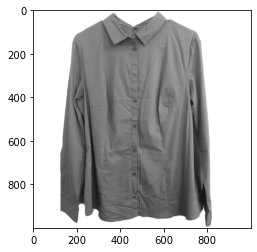

In [116]:
# 2nd raw image
# Grayscale the image using cv2
Sample_Image_2_gray = cv2.cvtColor(Sample_Image_2, cv2.COLOR_BGR2GRAY)
plt.imshow(Sample_Image_2_gray,cmap='gray')
plt.show()

In [29]:
# 2nd raw image
# Shape of grayscale image
Sample_Image_2_gray.shape

(1000, 1000)

In [30]:
# 2nd raw image
# Resizing the image to the correct size (28,28)
Df2=cv2.resize(Sample_Image_2_gray,(28,28))
Df2.shape

(28, 28)

In [31]:
# 2nd raw image
# Flattening the image through reshaping
New_Shirt_Image=np.reshape(Df2,(-1,28*28))

print(New_Shirt_Image.shape)

(1, 784)


In [117]:
#Predicting the image with the best model
y_R_test_hat  = random_model.predict(New_Shirt_Image)
print(class_names[y_R_test_hat[0]])

Shirt


#### *Trouser Image*

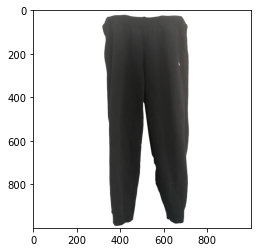

In [32]:
# 3rd raw image
# Reading the image
Sample_Image_3 = cv2.imread('trouser_file.jpg')

plt.imshow(Sample_Image_3)

plt.show()

In [33]:
# 3rd raw image
# Shape of the raw image
Sample_Image_3.shape

(1000, 1000, 3)

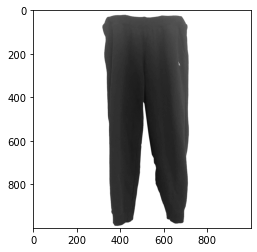

In [118]:
# 3rd raw image
# Grayscale the image using cv2
Sample_Image_3_gray = cv2.cvtColor(Sample_Image_3, cv2.COLOR_BGR2GRAY)
plt.imshow(Sample_Image_3_gray,cmap='gray')
plt.show()

In [35]:
# 3rd raw image
# Shape of grayscale image
Sample_Image_3_gray.shape

(1000, 1000)

In [36]:
# 3rd raw image
# Resizing the image to the correct size (28,28)
Df3=cv2.resize(Sample_Image_3_gray,(28,28))
Df3.shape

(28, 28)

In [37]:
# 3rd raw image
# Flattening the image through reshaping
New_Trouser_Image=np.reshape(Df3,(-1,28*28))

print(New_Trouser_Image.shape)

(1, 784)


In [119]:
#Predicting the image with the best model
y_R_test_hat  = random_model.predict(New_Trouser_Image)
print(class_names[y_R_test_hat[0]])

Shirt


#### *Backpack Image*

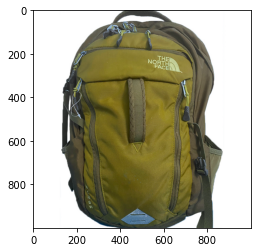

In [38]:
# 4th raw image
# Reading the image
Sample_Image_4 = cv2.imread('backpack_file.jpg')

plt.imshow(Sample_Image_4)

plt.show()

In [39]:
# 4th raw image
# Shape of the raw image
Sample_Image_4.shape

(1000, 1000, 3)

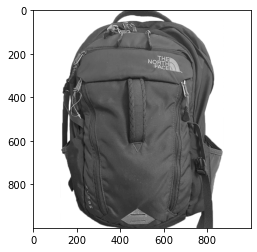

In [120]:
# 4th raw image
# Grayscale the image using cv2
Sample_Image_4_gray = cv2.cvtColor(Sample_Image_4, cv2.COLOR_BGR2GRAY)
plt.imshow(Sample_Image_4_gray,cmap='gray')
plt.show()

In [41]:
# 4th raw image
# Shape of grayscale image
Sample_Image_4_gray.shape

(1000, 1000)

In [42]:
# 4th raw image
# Resizing the image to the correct size (28,28)
Df4=cv2.resize(Sample_Image_4_gray,(28,28))
Df4.shape

(28, 28)

In [43]:
# 4th raw image
# Flattening the image through reshaping
New_Backpack_Image=np.reshape(Df4,(-1,28*28))

print(New_Backpack_Image.shape)

(1, 784)


In [121]:
#Predicting the image with the best model
y_R_test_hat  = random_model.predict(New_Backpack_Image)
print(class_names[y_R_test_hat[0]])

Shirt


#### *Dress Image*

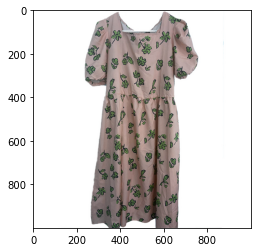

In [44]:
# 5th raw image
# Reading the image
Sample_Image_5 = cv2.imread('dress_file.jpg')

plt.imshow(Sample_Image_5)

plt.show()

In [45]:
# 5th raw image
# Shape of the raw image
Sample_Image_5.shape

(1000, 1000, 3)

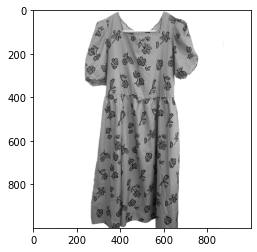

In [122]:
# 5th raw image
# Grayscale the image using cv2
Sample_Image_5_gray = cv2.cvtColor(Sample_Image_5, cv2.COLOR_BGR2GRAY)
plt.imshow(Sample_Image_5_gray,cmap='gray')
plt.show()

In [47]:
# 5th raw image
# Shape of grayscale image
Sample_Image_5_gray.shape

(1000, 1000)

In [48]:
# 5th raw image
# Resizing the image to the correct size (28,28)
Df5=cv2.resize(Sample_Image_5_gray,(28,28))
Df5.shape

(28, 28)

In [49]:
# 5th raw image
# Flattening the image through reshaping
New_Dress_Image=np.reshape(Df5,(-1,28*28))

print(New_Dress_Image.shape)

(1, 784)


In [123]:
#Predicting the image with the best model
y_R_test_hat  = random_model.predict(New_Dress_Image)
print(class_names[y_R_test_hat[0]])

Shirt


#### *Slipper Image*

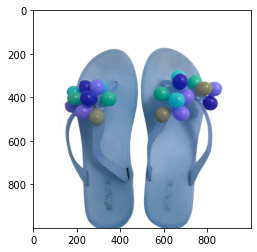

In [50]:
# 6th raw image
# Reading the image
Sample_Image_6 = cv2.imread('slippers_file.jpg')

plt.imshow(Sample_Image_6)

plt.show()

In [51]:
# 6th raw image
# Shape of the raw image
Sample_Image_6.shape

(1000, 1000, 3)

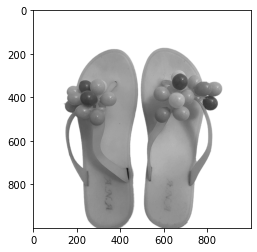

In [124]:
# 6th raw image
# Grayscale the image using cv2
Sample_Image_6_gray = cv2.cvtColor(Sample_Image_6, cv2.COLOR_BGR2GRAY)
plt.imshow(Sample_Image_6_gray,cmap='gray')
plt.show()

In [53]:
# 6th raw image
# Shape of grayscale image
Sample_Image_6_gray.shape

(1000, 1000)

In [54]:
# 6th raw image
# Resizing the image to the correct size (28,28)
Df6=cv2.resize(Sample_Image_6_gray,(28,28))
Df6.shape

(28, 28)

In [55]:
# 6th raw image
# Flattening the image through reshaping
New_Slippers_Image=np.reshape(Df6,(-1,28*28))

print(New_Slippers_Image.shape)

(1, 784)


In [125]:
#Predicting the image with the best model
y_R_test_hat  = random_model.predict(New_Slippers_Image)
print(class_names[y_R_test_hat[0]])

Bag


#### *Pant Image*

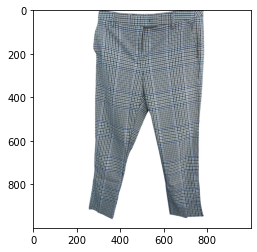

In [56]:
# 7th raw image
# Reading the image
Sample_Image_7 = cv2.imread('pants_file.jpg')

plt.imshow(Sample_Image_7)

plt.show()

In [57]:
# 7th raw image
# Shape of the raw image
Sample_Image_7.shape

(1000, 1000, 3)

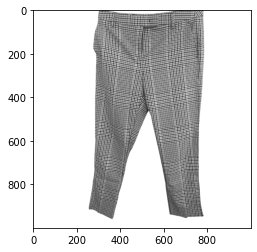

In [126]:
# 7th raw image
# Grayscale the image using cv2
Sample_Image_7_gray = cv2.cvtColor(Sample_Image_7, cv2.COLOR_BGR2GRAY)
plt.imshow(Sample_Image_7_gray,cmap='gray')
plt.show()

In [59]:
# 7th raw image
# Shape of grayscale image
Sample_Image_7_gray.shape

(1000, 1000)

In [60]:
# 7th raw image
# Resizing the image to the correct size (28,28)
Df7=cv2.resize(Sample_Image_7_gray,(28,28))
Df7.shape

(28, 28)

In [61]:
# 7th raw image
# Flattening the image through reshaping
New_Pants_Image=np.reshape(Df7,(-1,28*28))

print(New_Pants_Image.shape)

(1, 784)


In [128]:
#Predicting the image with the best model
y_R_test_hat  = random_model.predict(New_Pants_Image)
print(class_names[y_R_test_hat[0]])

Shirt


#### *Boot Image*

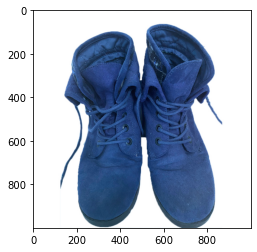

In [108]:
# 8th raw image
# Reading the image
Sample_Image_8 = cv2.imread('boots_file.jpg')

plt.imshow(Sample_Image_8)

plt.show()

In [63]:
# 8th raw image
# Shape of the raw image
Sample_Image_8.shape

(1000, 1000, 3)

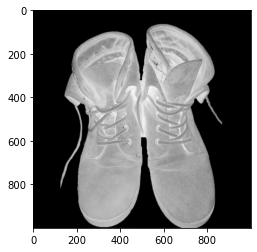

In [91]:
# 8th raw image
# Grayscale the image using cv2
Sample_Image_8_gray = cv2.cvtColor(Sample_Image_8, cv2.COLOR_BGR2GRAY)
plt.imshow(Sample_Image_8_gray,cmap='binary')
plt.show()

In [65]:
# 8th raw image
# Shape of grayscale image
Sample_Image_8_gray.shape

(1000, 1000)

In [66]:
# 8th raw image
# Resizing the image to the correct size (28,28)
Df8=cv2.resize(Sample_Image_8_gray,(28,28))
Df8.shape

(28, 28)

In [67]:
# 8th raw image
# Flattening the image through reshaping
New_Boots_Image=np.reshape(Df8,(-1,28*28))

print(New_Boots_Image.shape)

(1, 784)


In [129]:
#Predicting the image with the best model
y_R_test_hat  = random_model.predict(New_Boots_Image)
print(class_names[y_R_test_hat[0]])

Shirt


#### *Purse Image*

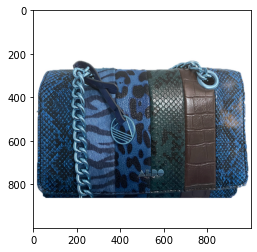

In [136]:
# 9th raw image
# Reading the image
Sample_Image_9 = cv2.imread('purse_file.jpg')

plt.imshow(Sample_Image_9)

plt.show()

In [137]:
# 9th raw image
# Shape of the raw image
Sample_Image_9.shape

(1000, 1000, 3)

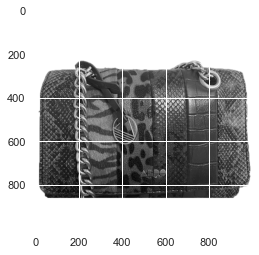

In [259]:
# 9th raw image
# Grayscale the image using cv2
Sample_Image_9_gray = cv2.cvtColor(Sample_Image_9, cv2.COLOR_BGR2GRAY)
plt.imshow(Sample_Image_9_gray,cmap='gray')
plt.show()

In [71]:
# 9th raw image
# Shape of grayscale image
Sample_Image_9_gray.shape

(1000, 1000)

In [72]:
# 9th raw image
# Resizing the image to the correct size (28,28)
Df9=cv2.resize(Sample_Image_9_gray,(28,28))
Df9.shape

(28, 28)

In [73]:
# 9th raw image
# Flattening the image through reshaping
New_Purse_Image=np.reshape(Df9,(-1,28*28))

print(New_Purse_Image.shape)

(1, 784)


In [113]:
#Predicting the image with the best model
y_R_test_hat_1  = random_model.predict(New_Purse_Image)
print(class_names[y_R_test_hat[0]])

Shirt


#### *Jacket Image*

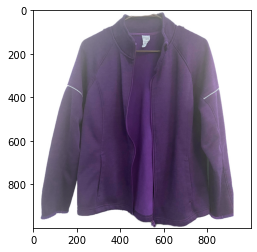

In [74]:
# 10th raw image
# Reading the image
Sample_Image_10 = cv2.imread('jacket_file.jpg')

plt.imshow(Sample_Image_10)

plt.show()

In [75]:
# 10th raw image
# Shape of the raw image
Sample_Image_10.shape

(1000, 1000, 3)

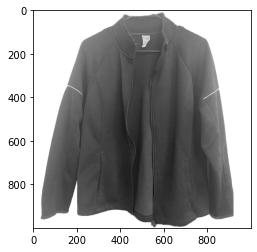

In [134]:
# 10th raw image
# Grayscale the image using cv2
Sample_Image_10_gray = cv2.cvtColor(Sample_Image_10, cv2.COLOR_BGR2GRAY)
plt.imshow(Sample_Image_10_gray,cmap='gray')
plt.show()

In [77]:
# 10th raw image
# Shape of grayscale image
Sample_Image_10_gray.shape

(1000, 1000)

In [78]:
# 10th raw image
# Resizing the image to the correct size (28,28)
Df10=cv2.resize(Sample_Image_10_gray,(28,28))
Df10.shape

(28, 28)

In [79]:
# 10th raw image
# Flattening the image through reshaping
New_Jacket_Image=np.reshape(Df10,(-1,28*28))

print(New_Jacket_Image.shape)

(1, 784)


In [135]:
#Predicting the image with the best model
y_R_test_hat_1  = random_model.predict(New_Jacket_Image)
print(class_names[y_R_test_hat[0]])

Shirt


## <u>Visualize all the images side by side</u>

<p>Through below codes, I have tried to visualize my fashion items side by side giving <u>cmap='gray'</u>.</p>

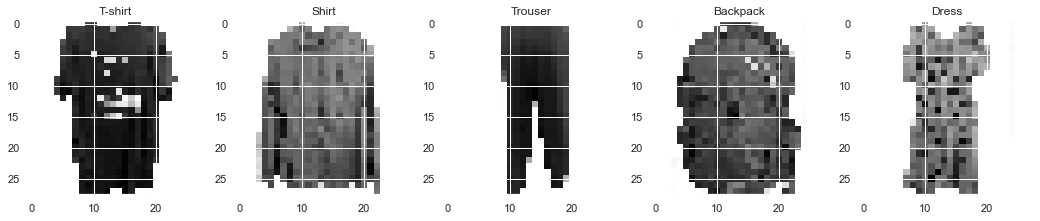

In [228]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,5, figsize=(18,18))
axes[0].imshow(Df1,cmap='gray')
axes[1].imshow(Df2,cmap='gray')
axes[2].imshow(Df3,cmap='gray')
axes[3].imshow(Df4,cmap='gray')
axes[4].imshow(Df5,cmap='gray')

axes[0].set_title("T-shirt")
axes[1].set_title("Shirt")
axes[2].set_title("Trouser")
axes[3].set_title("Backpack")
axes[4].set_title("Dress")

plt.show()

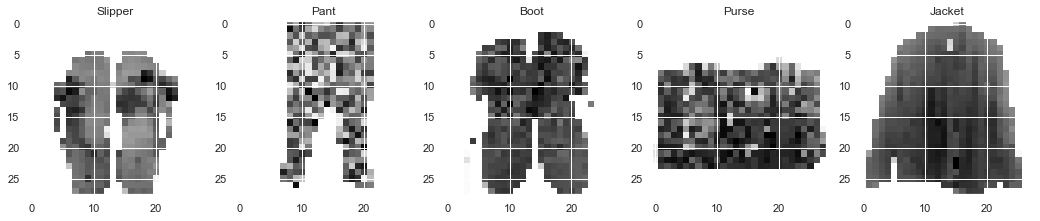

In [229]:
fig, axes = plt.subplots(1,5, figsize=(18,18))

axes[0].imshow(Df6,cmap='gray')
axes[1].imshow(Df7,cmap='gray')
axes[2].imshow(Df8,cmap='gray')
axes[3].imshow(Df9,cmap='gray')
axes[4].imshow(Df10,cmap='gray')

axes[0].set_title("Slipper")
axes[1].set_title("Pant")
axes[2].set_title("Boot")
axes[3].set_title("Purse")
axes[4].set_title("Jacket")

plt.show()

## <u>Conclusion</u>

<p>After comparing all 10 prediction results, I have noticed that out of 10 items our best model with 87.75% accuracy score was able to predict only one item correctly which is shirt and for everything else the prediction came wrong. And in most of the cases random forest model was predicting everything as shirt exactly 9 out of 10 times. So, the actual accuracy level of our best model(Random Forest Model) is approximately 10% on real time raw data. There is a famous saying, <u>Garbage in Garbage out</u> meaning if one gives incorrect or poor quality input will always produce faulty output. As our best model has an accuracy of 87.75 out of 100 which is not great, so this kind of result was expected.</p>